In [19]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as plt

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
%matplotlib inline

In [47]:
selection = np.random.exponential(scale=1, size=25)
print("selection:", selection)

selection: [2.40911622 0.75800243 0.75782018 1.07453998 4.20210524 0.71446218
 2.37271532 0.44324121 1.52965764 0.70995105 0.82994633 0.30837095
 0.10025971 0.07281577 0.48633579 0.04150836 0.52482257 1.00280152
 1.56905157 0.09481224 2.09853602 0.29839779 0.09372805 1.56474286
 0.6569016 ]


In [45]:

print("Вариационный ряд\nselection:",np.sort(selection))

Вариационный ряд (упорядоченная выборка)
selection: [0.01206437 0.06300192 0.07627473 0.08886018 0.1060142  0.14148547
 0.15648574 0.19851993 0.28505591 0.39978112 0.4070475  0.45547406
 0.48652936 0.55946525 0.65498539 0.79293526 1.13117624 1.23983259
 1.28805073 1.31460206 2.04821098 2.53603157 2.74138193 3.46300015
 4.34349566]


In [22]:
series = pd.Series(selection)
mode_value = series.mode()
print('а)')
print(f'Мода: {mode_value.tolist()}')
print(f'Медиана: {np.median(selection)}')
print(f'Размах: {np.max(selection) - np.min(selection)}')
print(f'Коэф-нт ассиметрии: {stats.skew(selection)}')



а)
Мода: [0.012064374761432444, 0.06300191633593463, 0.07627472624443306, 0.08886018185390346, 0.10601420145225318, 0.14148546549690055, 0.15648574015616723, 0.19851993166114498, 0.28505590655668334, 0.3997811225490014, 0.407047495581068, 0.45547405802828195, 0.48652935726903906, 0.5594652469485596, 0.6549853889115151, 0.7929352584080311, 1.1311762443208595, 1.2398325877970569, 1.288050729469432, 1.314602060606524, 2.048210984701642, 2.5360315684926378, 2.741381932582791, 3.4630001512891764, 4.343495659738909]
Медиана: 0.48652935726903906
Размах: 4.3314312849774765
Коэф-нт ассиметрии: 1.4928393234709696


б)
26


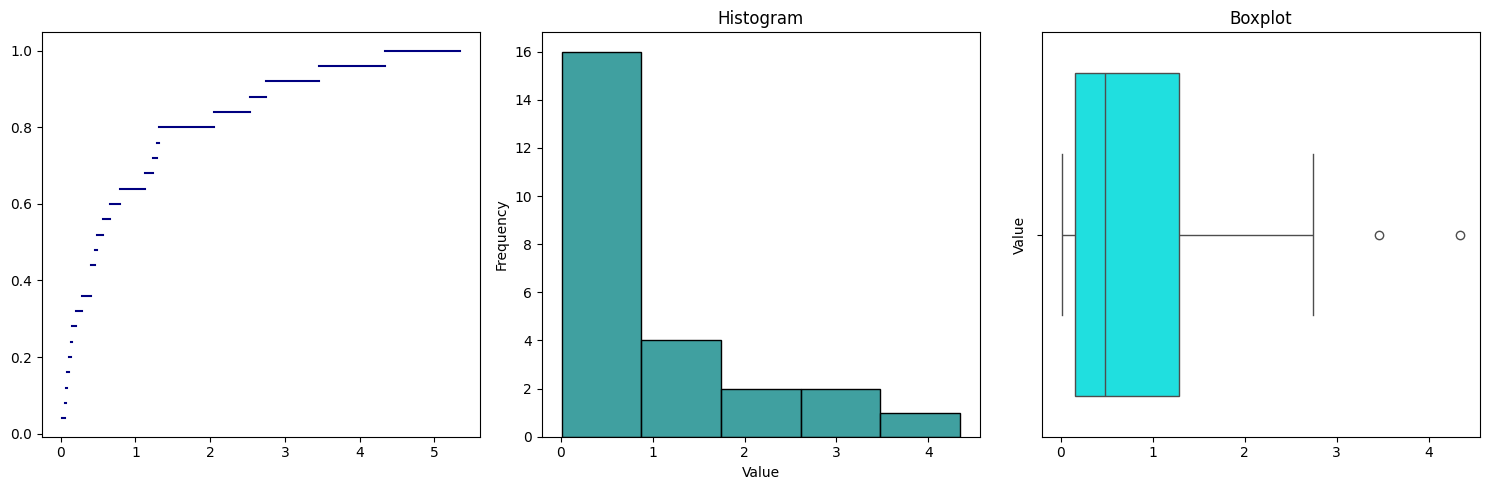

In [40]:
import statsmodels.api as sm
import seaborn as sns
import math

print("б)")
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

X = selection.copy()
X.sort()

# Строим эмпирическую функцию распределения
y = np.linspace(1/25, 1, 25)
X = np.append(X, np.max(X)+1)
print(len(X))
for i in range (0, 25):
    axs[0].plot([X[i], X[i+1]], [y[i], y[i]], color = 'navy')


#  Строим гистограмму
sns.histplot(selection, bins=1 + math.floor(math.log2(len(selection))), kde=False, color='teal', ax=axs[1])
axs[1].set_title('Histogram')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

# Строим боксплот
sns.boxplot(x=selection, color='cyan', ax=axs[2], orient='h')
axs[2].set_title('Boxplot')
axs[2].set_ylabel('Value')
plt.tight_layout()

с)


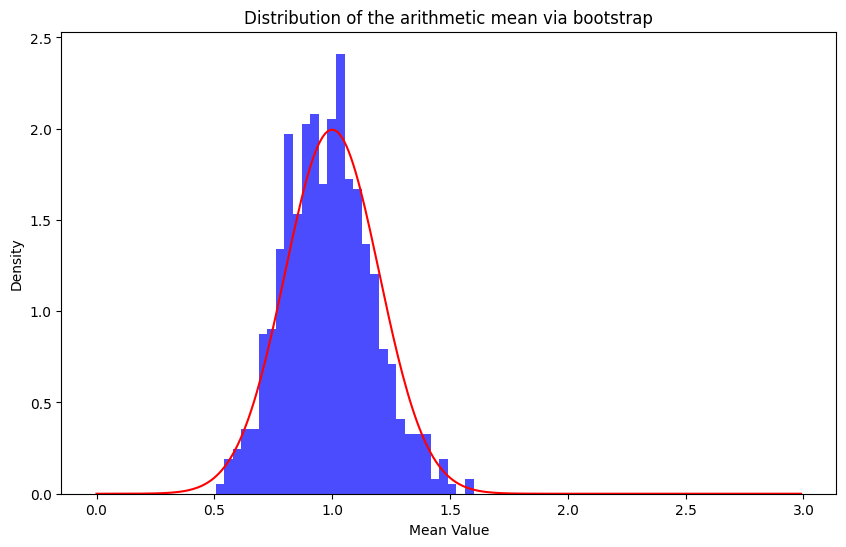

In [58]:
print('с)')
# Число повторов
repeat = 1000

# Бутстрап
bootstrap_means = []
for _ in range(repeat):
    resample = np.random.choice(selection, size=len(selection), replace=True)
    bootstrap_means.append(np.mean(resample))

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, density=True, color='b', alpha=0.7)
x = np.arange(0, 3, 0.01)
plt.plot(x, norm.pdf(x, 1, 1/5), color = "red")
plt.title('Distribution of the arithmetic mean via bootstrap')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.show()

д)


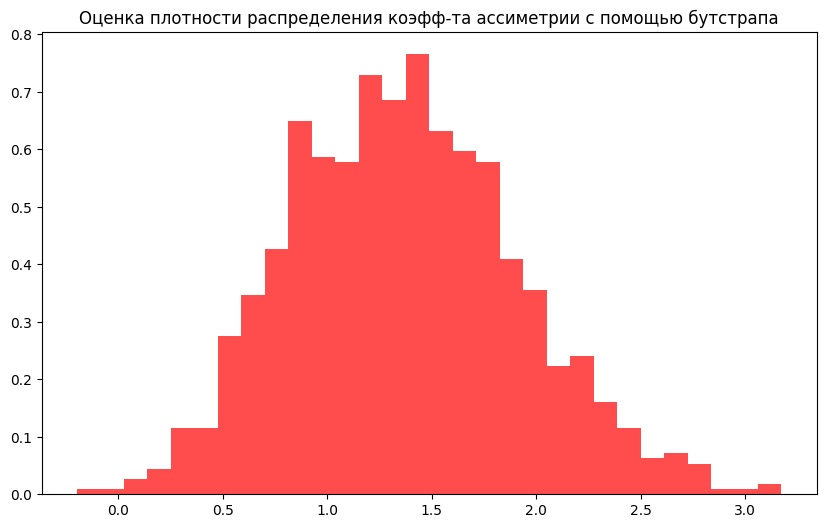

Вероятность того, что skew < 1: 0.278


In [52]:
print('д)')
# Число повторов
repeat = 1000

# Бутстрап
skew = []
for _ in range(repeat):
    resample = np.random.choice(selection, size=len(selection), replace=True)
    skewness = stats.skew(resample)
    skew.append(skewness)


plt.figure(figsize=(10, 6))
plt.hist(skew, bins=30, density=True, color='r', alpha=0.7)

plt.title('Оценка плотности распределения коэфф-та ассиметрии с помощью бутстрапа')
plt.show()

print(f'Вероятность того, что skew < 1: {len([num for num in skew if num < 1]) / len(skew)}')

e)


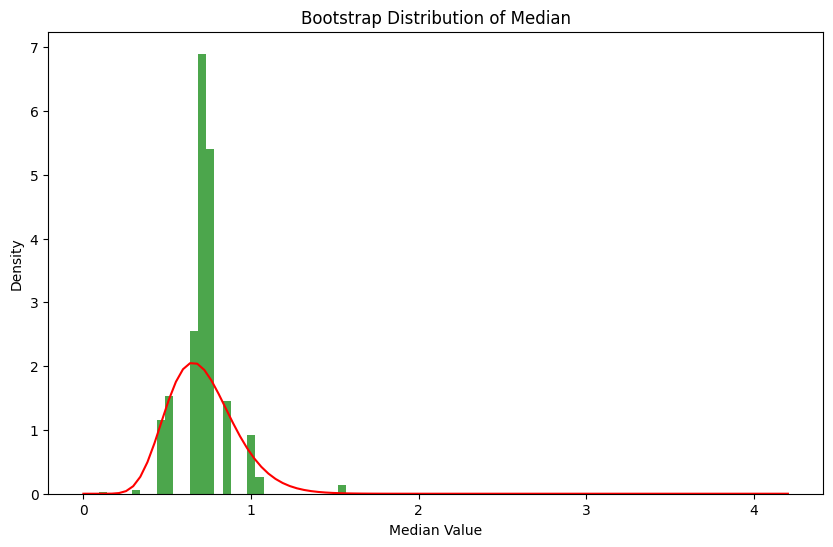

In [59]:
def median(x):
  return 25 * 2704156 * np.exp(-13 * x) * (1 - np.exp(-x)) ** 12

print('e)')
# Число повторов
num_resamples = 1000
selection_sorted = np.sort(selection)

# Бутстрап
bootstrap_medians = []
for _ in range(num_resamples):
    resample = np.random.choice(selection_sorted, size=len(selection_sorted), replace=True)
    bootstrap_medians.append(np.median(resample))


plt.figure(figsize=(10, 6))
plt.hist(bootstrap_medians, bins=30, density=True, color='g', alpha=0.7)

x_coord = np.linspace(0, selection_sorted[-1], 100)
y_coord = median(x_coord)
plt.plot(x_coord, y_coord, color = "red")

plt.title('Bootstrap Distribution of Median')
plt.xlabel('Median Value')
plt.ylabel('Density')
plt.show()